## Put all files in a folder with the family as a prefix

In [ ]:
import os
from rouskinhf import convert

path = '/Users/yvesmartin/data/RNAStralign/'
os.mkdir('data')
def fetch(path, prefix=''):
    for filename in os.listdir(path):
        file = os.path.join(path, filename)
        if os.path.isdir(file):
            fetch(file, prefix+filename+'__')
        else:
            if filename.endswith('.ct'):
                filename = filename.replace('(', '_').replace(')', '_')   
                os.system(cmd:=f'cp "{file}" data/{prefix}####{filename}')
fetch(path)

## Run RouskinHF on the folder

In [4]:
# !pip install /Users/yvesmartin/src/rouskinhf
from rouskinhf import convert
data = convert(
                'ct',
                'data',
                name='RNAstralign',
                filter=True
            )

Parsing ct files: 100%|██████████| 37149/37149 [00:15<00:00, 2405.21it/s]


Over a total of 37149 datapoints, there are:
### OUTPUT
- ALL: 27125 valid datapoints
- INCLUDED: 104 duplicate sequences with different structure / dms / shape
### MODIFIED
- 1244 multiple sequences with the same reference (renamed reference)
### FILTERED OUT
- 3949 invalid datapoints (ex: sequence with non-regular characters)
- 9 datapoints with bad structures
- 6066 duplicate sequences with the same structure / dms / shape


In [12]:
len(data)

27125

## Rename the refs so that the family as an attribute of the json

In [13]:
new_data = {}
refs = {}
for ref, attr in data.items():
    if '__####' in ref:
        family, ref = ref.split('__####')
        attr['family'] = family
    if not ref in refs:
        refs[ref] = 0
    else:
        while f'{ref}_{refs[ref]}' in refs:
            refs[ref] += 1
        ref = f'{ref}_{refs[ref]}'
    new_data[ref] = attr
    
import json
with open('data/RNAstralign/data.json', 'w') as f:
    f.write('{\n')
    for idx, (ref, attr) in enumerate(new_data.items()):
        f.write(json.dumps({ref: attr})[1:-1])
        if idx < len(new_data)-1:
            f.write(',\n')
    f.write('\n}')
    

27082


## Visualise



<Axes: >

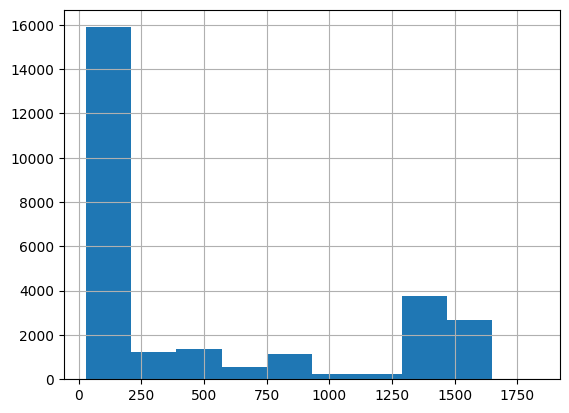

In [14]:
import pandas as pd

df = pd.DataFrame.from_dict(new_data, orient='index')
df.sequence.apply(len).hist(bins=10)

## Upload

In [15]:

from rouskinhf import upload_dataset
import envbash
envbash.load.load_envbash('../.env')

upload_dataset(
    'data/RNAstralign/data.json',
    commit_message='fixed rouskinhf reference bug',
    exist_ok=True
)

data.json:   0%|          | 0.00/64.9M [00:00<?, ?B/s]